![Screenshot 2025-09-19 091838.png](<attachment:Screenshot 2025-09-19 091838.png>)
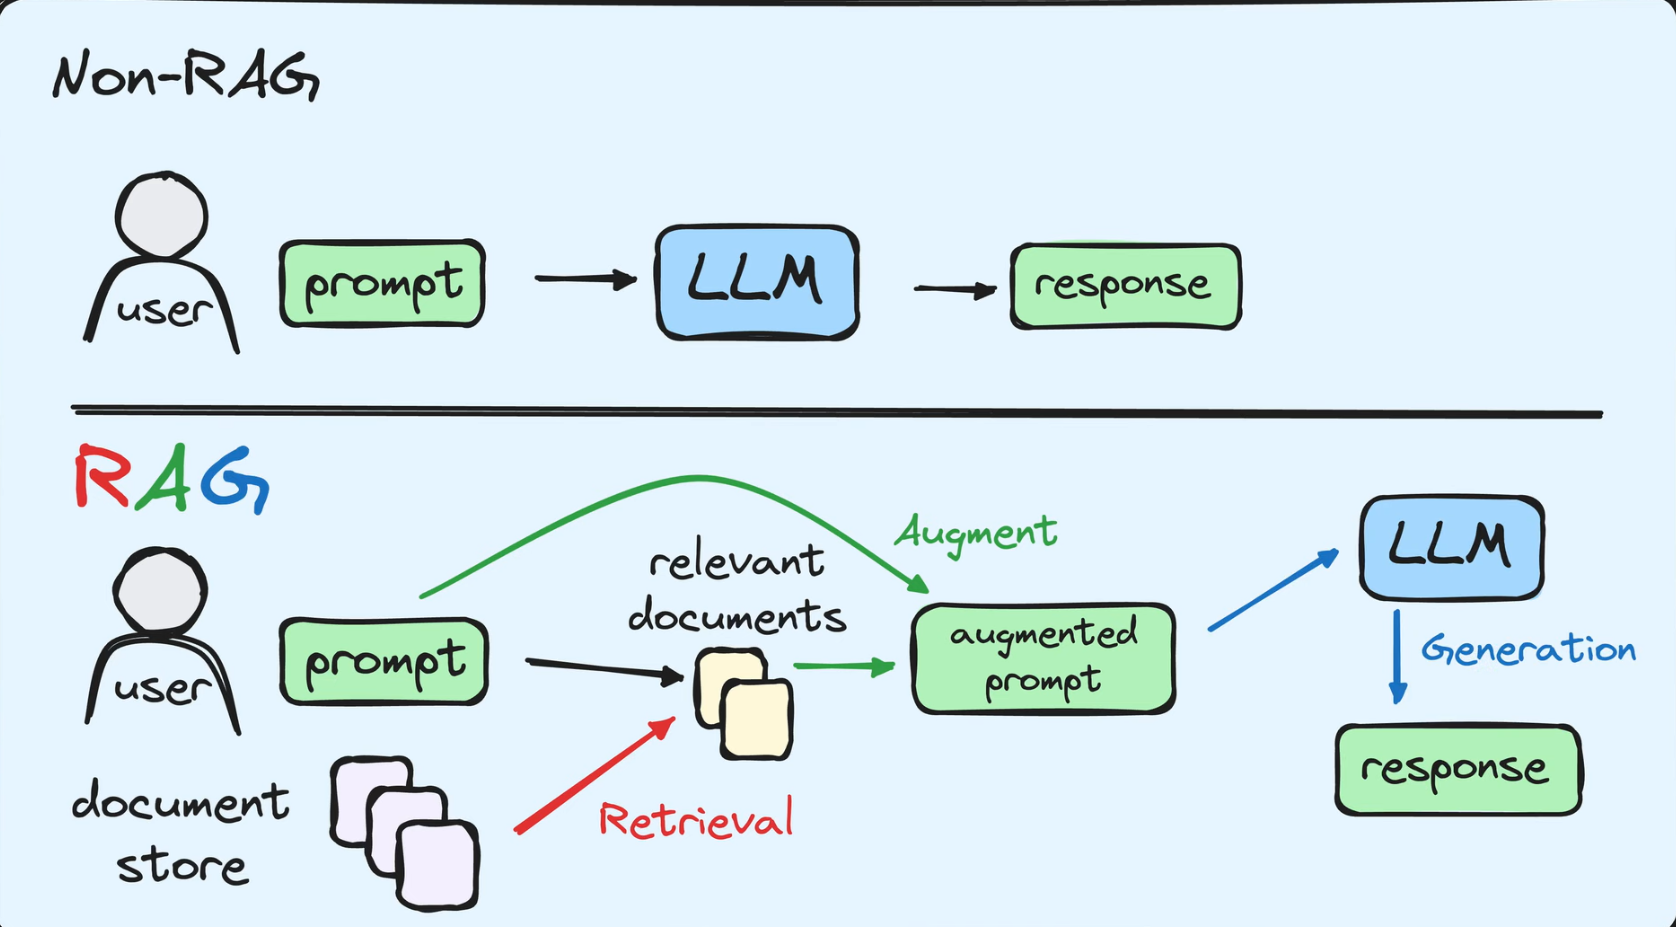

In [4]:
pip install faiss-cpu

   ---------------------------------------- 0.0/18.2 MB ? eta -:--:--
   -- ------------------------------------- 1.3/18.2 MB 6.9 MB/s eta 0:00:03
   ------ --------------------------------- 3.1/18.2 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 4.7/18.2 MB 7.4 MB/s eta 0:00:02
   ------------- -------------------------- 6.3/18.2 MB 7.5 MB/s eta 0:00:02
   ----------------- ---------------------- 7.9/18.2 MB 7.5 MB/s eta 0:00:02
   -------------------- ------------------- 9.2/18.2 MB 7.3 MB/s eta 0:00:02
   ------------------------ --------------- 11.3/18.2 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 12.8/18.2 MB 7.7 MB/s eta 0:00:01
   ------------------------------- -------- 14.4/18.2 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 16.5/18.2 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  17.8/18.2 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 18.2/18.2 MB 7.3 MB/s  0:00:02
Not

In [2]:
pip install langchain-community


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 621.4 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.5 MB 710.1 kB/s eta 0:00:03
   ------------ --------------------------- 0.8/2.5 MB 710.1 kB/s eta 0:00:03
   ------------ --------------------------- 0.8/2.5 MB 710.1 kB/s eta 0:00:03
   ---------------- ----------------------- 1.0/2.5 MB 643.8 kB/s eta 0:00:03
   -------------------- ------------------- 1.3/2.5 MB 648.1 kB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.5 MB 648.1 kB/s eta 0:00:02
   ------------------------ --------------- 1.6/2.5 MB 642.4 kB/s eta 0:00:02
   ------------------------ --------------- 1.6/2.5 MB 642.4 kB/s eta 0:00:02
   -------------------

In [12]:
!pip install sentence-transformers

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.6 MB 11.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 10.8 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.6 MB 10.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 10.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.6 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 9.3 MB/s  0:00:01
   ---------------------------------------- 0.0/563.4 kB ? eta -:--:--
   ---------------------------------------- 563.4/563.4 kB 8.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 6.9 MB/s  0:00:00
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ------------------------

In [6]:
import os
import google.generativeai as genai
from langchain.vectorstores import FAISS  # This will be the vector database
from langchain_community.embeddings import HuggingFaceBgeEmbeddings # To perform word embeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter # This is for chucking
from pypdf import PdfReader # To read PDF files
import faiss


In [13]:
# Step 1: Configure the models

# Configure LLM
key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)
llm_model = genai.GenerativeModel('gemini-2.5-flash-lite')

# Configure Embedding Model
embedding_model = HuggingFaceBgeEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not install

In [17]:
# Step 2 : Loading the PDF File
loaded_file = PdfReader('MyCertificate.pdf')

raw_text = ''
for page in loaded_file.pages:
    text_only = page.extract_text()
    if text_only:
        raw_text += text_only

In [23]:
# Step 3: Chunking (create chunks)
splitter = RecursiveCharacterTextSplitter(chunk_size = 300, chunk_overlap = 50)
chunks = splitter.split_text(raw_text)


In [24]:
len(chunks)

16

In [25]:
print(chunks[0])

Case Study: RAG Chatbot Powered by Google 
Gemini for Smart Document Q&A 
Project Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation 
(RAG) with Gemini 
GitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini


In [26]:
# Step 4: Create FAISS Vector store

vector_store = FAISS.from_texts(chunks, embedding_model)

In [39]:
# Step 5: Configure retriever
retriever = vector_store.as_retriever(search_kwargs = {'k':5})

In [28]:
# Step 6: Take the query:
query = "Show me the steps to proceed with this projects."

In [29]:
# Step 7: Retrieval (R)
retriever_docs = retriever.get_relevant_documents(query = query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15860\2230547623.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever_docs = retriever.get_relevant_documents(query = query)


In [32]:
context = ''.join([doc.page_content for doc in retriever_docs])
context

'Live Demo: https://gemini-rag2025.streamlit.app/ \n \nProblem Statement \nAcross industries such as legal, finance, healthcare, and construction, professionals are \nrequired to extract insights from massive document repositories—contracts, product \nmanuals, policies, reports, regulations, and emails.4. Ask questions in natural language \n5. Get contextual answers generated by Google Gemini 1.5 Flash using the retrieved \ndocuments \n \nArchitecture Overview \n1. Frontend: Streamlit web UI for uploading files and chat interfaceCase Study: RAG Chatbot Powered by Google \nGemini for Smart Document Q&A \nProject Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation \n(RAG) with Gemini \nGitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini'

In [37]:
# Step 8: Write a Augmeneted Prompt (A)
prompt = f''' You are a helpful assistant using RAG
 Here is the context {context}
 
 The query asked by user is as follows = {query}'''

In [40]:
# Step 9: Generation (G)
print(llm_model.generate_content(prompt).text)

Based on the provided information, here are the steps to proceed with this project, outlined from a user's perspective interacting with the "Intelligent Document Q&A Assistant using Retrieval-Augmented Generation (RAG) with Gemini":

**User Steps to Proceed:**

1.  **Access the Live Demo:**
    *   Go to the provided Streamlit application URL: [https://gemini-rag2025.streamlit.app/](https://gemini-rag2025.streamlit.app/)

2.  **Upload Your Documents:**
    *   Look for an option on the web UI to upload your document repository. This could be in various formats relevant to your industry (contracts, manuals, reports, etc.).

3.  **Ask Questions in Natural Language:**
    *   Once your documents are uploaded and processed, you will find a chat interface.
    *   Type your questions about the uploaded documents in plain, natural language. For example:
        *   "What are the key clauses in this contract?"
        *   "What is the recommended maintenance schedule for this product?"
      